In [153]:
import numpy as np
import matplotlib.pyplot as plt

In [193]:
def magnification(AL, AP):
    """""
    AL: axial length (mm)
    AP: distance from corneal apex to secondary principal point of the eye (mm)
    
    Assumption:
    1. West German Zeiss fundus camera with telecentric design; thus, camera magnification constant, p, is 1.37
    
    Return:
    total magnification
    """""
    k = AL - AP
    return 1 / (0.01306*k*1.37)

def F_eye_to_ametropia(F_eye, k=22.04):
    """""
    F_eye: equivalent power of the eye
    k: distance between the secondary principal point of the eye and retina
    
    Return:
    ametropia given F_eye assuming that 'k' is normal (as per Gullstrand-Emsley emmetropic eye), i.e. 22.04mm
    """""
    k = k/1000
    ametropia = (1.333 / k) - F_eye
    return ametropia

def ametropia_to_AL(ametropia, F_eye=60.49):
    """""
    F_eye: equivalent power of the eye
    ametropia: amount of refractive error in diopter
    
    Return:
    Axial length (m) of a given ametropic eye assuming that F_eye is normal (as per Gullstrand-Emsley emmetropic eye)
    
    Note:
    'k' is distance between secondary principal point of the eye and retina
    AL is 'k' plus the distance between corneal apex and secondary principal point, which is 1.85mm or 0.00185m
    """""
    k = 1.333 / (F_eye + ametropia)
    AL = 0.00185 + k

    return AL

### Emmetropia

In [194]:
AL = 23.89
AP = 1.85

# total magnification in an emmetropic eye
emm_mag = magnification(AL=AL, AP=AP)
print('Magnification if emmetropic: {:.3f}'.format(emm_mag))

Magnification if emmetropic: 2.536


### Refractive ametropia

In [195]:
refractive_ametropia = {'F_eye':[51.24, 56.2, 61.6, 55.65, 65.76, 60.55, 65.26, 70.39],
                        'AP':[1.65, 2.03, 2.35, 1.5, 2.17, 1.35, 1.69, 1.98],
                        'ametropia':[],
                       'magnification':[] }

for F_eye in refractive_ametropia['F_eye']:
    refractive_ametropia['ametropia'].append( F_eye_to_ametropia(F_eye=F_eye) )
    
for AP in refractive_ametropia['AP']:
    mag = magnification(AL=23.89, AP=AP)
    refractive_ametropia['magnification'].append(mag)


### Axial ametropia

In [196]:
axial_ametropia = {'ametropia':refractive_ametropia['ametropia'],
                   'AL':[],
                   'magnification':[] }

for ametropia in axial_ametropia['ametropia']:
    axial_ametropia['AL'].append( ametropia_to_AL(ametropia)*1000 )

for AL in axial_ametropia['AL']:
    axial_ametropia['magnification'].append(magnification(AL=AL, AP=1.85))
    

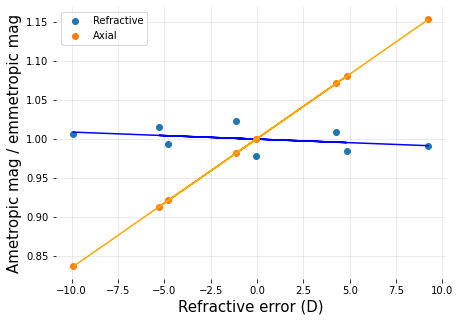

In [197]:
refractive_mag_ratio = np.array(refractive_ametropia['magnification'] ) / emm_mag
axial_mag_ratio = np.array(axial_ametropia['magnification']) / emm_mag

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

x = np.array(refractive_ametropia['ametropia'])

ax.plot(x, refractive_mag_ratio, 'o', label='Refractive')
m,b = np.polyfit(x, refractive_mag_ratio, 1)
ax.plot(x, m*x+b, 'b')

ax.plot(x, axial_mag_ratio, 'o', label='Axial')
m,b = np.polyfit(x, axial_mag_ratio, 1)
ax.plot(x, m*x+b, 'orange')

ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
plt.xlabel('Refractive error (D)', fontsize=15)
plt.ylabel('Ametropic mag / emmetropic mag', fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.savefig('figures/2021-12-29-fig2.png')